In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

path = r"C:\Users\Administrator\Rel Humidity"

In [2]:
merge = read_csv(path + "\merge.csv")
df = merge.drop(columns=["Unnamed: 0","Dis No","name","num"])
df

,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,Appeal,Declaration,...,latitude,longitude,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value
0,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,-25.274398,133.775136,Millions,454964,NaN,19795,159430,44514,194803,17603
1,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,No,No,...,42.708678,19.374390,Millions,...,NaN,24244,124366,24592,136650,83943
2,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,46.227638,2.213749,Millions,1053546,NaN,60826,109337,35309,162003,56667
3,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,No,No,...,8.537981,-80.782127,Millions,...,NaN,18058,92473,9215,123481,511
4,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,-25.274398,133.775136,Millions,482370,NaN,12667,158592,46612,209118,17799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,NaN,NaN,...,20.593684,78.962880,Millions,197358000,63.748322,34049,146866,13608,152808,1366418
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,NaN,NaN,...,40.463667,-3.749220,Millions,1244375,2711.192871,34455,117714,16957,409289,46737
98,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,46.227638,2.213749,Millions,2437635,4491.735352,74919,96076,41928,222027,65130
99,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,46.227638,2.213749,Millions,2437635,4491.735352,74919,96076,41928,222027,65130


In [3]:
from datetime import datetime

# deal with lasting month/year
Syear = df["Start Year"]
Smonth = df["Start Month"]
Sday = df["Start Day"]
Eyear = df["End Year"]
Emonth = df["End Month"]
Eday = df["End Day"]

Sday = Sday.fillna(1).astype("int64")
Eday = Eday.fillna(1).astype("int64")

lstingdays = list()

for i in range(len(Syear)):
    time1 = datetime(Syear[i],Smonth[i],Sday[i])
    time2 = datetime(Eyear[i],Emonth[i],Eday[i])
    lstingday = (time2 - time1).days + 1
    lstingdays.append(lstingday)
    
df["Lasting Days"] = pd.Series(lstingdays, name="Lasting Days")
df = df.drop(columns = ['Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day'])
df

,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,Appeal,Declaration,...,longitude,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days
0,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,133.775136,Millions,454964,NaN,19795,159430,44514,194803,17603,1
1,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,No,No,...,19.374390,Millions,...,NaN,24244,124366,24592,136650,83943,38
2,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,2.213749,Millions,1053546,NaN,60826,109337,35309,162003,56667,1
3,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,No,No,...,-80.782127,Millions,...,NaN,18058,92473,9215,123481,511,15
4,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,133.775136,Millions,482370,NaN,12667,158592,46612,209118,17799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,NaN,NaN,...,78.962880,Millions,197358000,63.748322,34049,146866,13608,152808,1366418,1
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,NaN,NaN,...,-3.749220,Millions,1244375,2711.192871,34455,117714,16957,409289,46737,5
98,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,2.213749,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,14
99,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,2.213749,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,7


In [4]:
# processing health expense value
df = df.dropna(subset="HE_value")
# processing GDP value
df["GDP_value"][df["GDP_value"] == "..."] = np.nan
df = df.dropna(subset=["GDP_value"])
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21856\2301970847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GDP_value"][df["GDP_value"] == "..."] = np.nan
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21856\2301970847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GDP_value"][df["GDP_value"] == "..."] = np.nan


,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,Appeal,Declaration,...,longitude,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days
14,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,NaN,NaN,NaN,NaN,...,25.485830,Millions,28124.88,94.497452,24599,46568,5341,93981,7998,31
16,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,NaN,NaN,NaN,NaN,...,33.429859,Millions,10594.981,750.516724,9314,101052,5460,320357,943,1
17,2000,Heat wave,Greece,GRC,Southern Europe,Europe,NaN,NaN,NaN,NaN,...,21.824312,Millions,141247.2762,885.410400,38688,164302,1846,298026,11082,1
18,2000,Heat wave,Israel,ISR,Western Asia,Asia,NaN,NaN,NaN,NaN,...,-19.020835,Millions,540061.2,1513.944702,24433,197900,33167,308815,5946,1
19,2000,Heat wave,Jordan,JOR,Western Asia,Asia,NaN,NaN,NaN,NaN,...,36.238414,Millions,6185.74889,159.147644,17283,121002,1775,299110,5122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,NaN,NaN,...,78.962880,Millions,197358000,63.748322,34049,146866,13608,152808,1366418,1
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,NaN,NaN,...,-3.749220,Millions,1244375,2711.192871,34455,117714,16957,409289,46737,5
98,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,2.213749,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,14
99,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,2.213749,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,7


In [5]:
# processing associated disaster
assdrought = ((df["Associated Dis"] == "Drought")|(df["Associated Dis2"] == "Drought")).astype("int64")
asswildfire = ((df["Associated Dis"] == "Wildfire")|(df["Associated Dis2"] == "Wildfire")).astype("int64")

In [6]:
df["Associated Drought"] = pd.Series(assdrought, name = 'Associated Drought')
df["Associated Wildfire"] = pd.Series(asswildfire, name = 'Associated Wildfire')
df = df.drop(columns=["Associated Dis", "Associated Dis2"])
df

,Year,Disaster Subtype,Country,ISO,Region,Continent,Appeal,Declaration,Dis Mag Value,Total Deaths,...,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire
14,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,NaN,NaN,43.0,7.0,...,28124.88,94.497452,24599,46568,5341,93981,7998,31,0,0
16,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,NaN,NaN,43.0,5.0,...,10594.981,750.516724,9314,101052,5460,320357,943,1,0,0
17,2000,Heat wave,Greece,GRC,Southern Europe,Europe,NaN,NaN,44.0,27.0,...,141247.2762,885.410400,38688,164302,1846,298026,11082,1,0,0
18,2000,Heat wave,Israel,ISR,Western Asia,Asia,NaN,NaN,45.0,NaN,...,540061.2,1513.944702,24433,197900,33167,308815,5946,1,0,0
19,2000,Heat wave,Jordan,JOR,Western Asia,Asia,NaN,NaN,43.0,NaN,...,6185.74889,159.147644,17283,121002,1775,299110,5122,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,NaN,22.0,...,197358000,63.748322,34049,146866,13608,152808,1366418,1,0,0
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,NaN,2.0,...,1244375,2711.192871,34455,117714,16957,409289,46737,5,0,0
98,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,46.0,567.0,...,2437635,4491.735352,74919,96076,41928,222027,65130,14,0,0
99,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,44.0,868.0,...,2437635,4491.735352,74919,96076,41928,222027,65130,7,0,0


In [7]:
# processing appeal and declaration
appl_dclr = (df["Appeal"] == "Yes")|(df["Declaration"] == "Yes")
df["Appeal or Declaration"] = pd.Series(appl_dclr, name="Appeal or Declaration")
df = df.drop(columns=["Appeal", "Declaration"])
df

,Year,Disaster Subtype,Country,ISO,Region,Continent,Dis Mag Value,Total Deaths,No Injured,No Affected,...,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration
14,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,43.0,7.0,NaN,NaN,...,94.497452,24599,46568,5341,93981,7998,31,0,0,False
16,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,43.0,5.0,400.0,NaN,...,750.516724,9314,101052,5460,320357,943,1,0,0,False
17,2000,Heat wave,Greece,GRC,Southern Europe,Europe,44.0,27.0,176.0,NaN,...,885.410400,38688,164302,1846,298026,11082,1,0,0,False
18,2000,Heat wave,Israel,ISR,Western Asia,Asia,45.0,NaN,NaN,NaN,...,1513.944702,24433,197900,33167,308815,5946,1,0,0,False
19,2000,Heat wave,Jordan,JOR,Western Asia,Asia,43.0,NaN,12.0,NaN,...,159.147644,17283,121002,1775,299110,5122,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,22.0,450.0,NaN,...,63.748322,34049,146866,13608,152808,1366418,1,0,0,False
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,2.0,NaN,NaN,...,2711.192871,34455,117714,16957,409289,46737,5,0,0,False
98,2019,Heat wave,France,FRA,Western Europe,Europe,46.0,567.0,NaN,NaN,...,4491.735352,74919,96076,41928,222027,65130,14,0,0,False
99,2019,Heat wave,France,FRA,Western Europe,Europe,44.0,868.0,NaN,NaN,...,4491.735352,74919,96076,41928,222027,65130,7,0,0,False


In [8]:
# processing total deaths data
df = df.dropna(subset="Total Deaths")
df = df.drop(columns=['No Injured', 'No Affected',
       'No Homeless', 'Total Affected'])
df

,Year,Disaster Subtype,Country,ISO,Region,Continent,Dis Mag Value,Total Deaths,CPI,Location,...,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration
14,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,43.0,7.0,63.549547,"Sofia, Sofia-city, Stata Zagora, Blagoevgrad, ...",...,94.497452,24599,46568,5341,93981,7998,31,0,0,False
16,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,43.0,5.0,63.549547,Nicosia province,...,750.516724,9314,101052,5460,320357,943,1,0,0,False
17,2000,Heat wave,Greece,GRC,Southern Europe,Europe,44.0,27.0,63.549547,"Anatoliki Makedonia Kai Thraki, Attiki, Dytiki...",...,885.410400,38688,164302,1846,298026,11082,1,0,0,False
21,2000,Heat wave,Turkey,TUR,Western Asia,Asia,46.0,11.0,63.549547,"Adana, Adiyaman, Afyon, Agri, Aksaray, Amasya,...",...,199.499374,23706,124770,3908,268129,63240,31,1,0,False
23,2000,Heat wave,Romania,ROU,Eastern Europe,Europe,43.0,6.0,63.549547,"Bucuresti, Dolj provinces",...,69.893456,19278,63618,6192,112997,22137,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,22.0,94.349092,"Karnataka, Maharashtra, Madhya Pradesh, Rajast...",...,63.748322,34049,146866,13608,152808,1366418,1,0,0,False
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,2.0,94.349092,"Cordoba, Valladolid",...,2711.192871,34455,117714,16957,409289,46737,5,0,0,False
98,2019,Heat wave,France,FRA,Western Europe,Europe,46.0,567.0,94.349092,"Vaucluse, Bouches-du-Rhône, Hérault, Gard",...,4491.735352,74919,96076,41928,222027,65130,14,0,0,False
99,2019,Heat wave,France,FRA,Western Europe,Europe,44.0,868.0,94.349092,Toute la France métropolitaine (excepté l'oues...,...,4491.735352,74919,96076,41928,222027,65130,7,0,0,False


In [9]:
df.columns

Index(['Year', 'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent',
       'Dis Mag Value', 'Total Deaths', 'CPI', 'Location', 'Code', 'country',
       'latitude', 'longitude', 'GDP_Scale', 'GDP_value', 'HE_value',
       'Cereals', 'Fruit', 'Milk', 'Vegetables', 'Population_value',
       'Lasting Days', 'Associated Drought', 'Associated Wildfire',
       'Appeal or Declaration'],
      dtype='object')

In [10]:
# processing dis mag value
DisMag = df["Dis Mag Value"]
df["Dis Mag Value"] = df["Dis Mag Value"].fillna(round(DisMag.mean(),1))
df

,Year,Disaster Subtype,Country,ISO,Region,Continent,Dis Mag Value,Total Deaths,CPI,Location,...,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration
14,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,43.0,7.0,63.549547,"Sofia, Sofia-city, Stata Zagora, Blagoevgrad, ...",...,94.497452,24599,46568,5341,93981,7998,31,0,0,False
16,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,43.0,5.0,63.549547,Nicosia province,...,750.516724,9314,101052,5460,320357,943,1,0,0,False
17,2000,Heat wave,Greece,GRC,Southern Europe,Europe,44.0,27.0,63.549547,"Anatoliki Makedonia Kai Thraki, Attiki, Dytiki...",...,885.410400,38688,164302,1846,298026,11082,1,0,0,False
21,2000,Heat wave,Turkey,TUR,Western Asia,Asia,46.0,11.0,63.549547,"Adana, Adiyaman, Afyon, Agri, Aksaray, Amasya,...",...,199.499374,23706,124770,3908,268129,63240,31,1,0,False
23,2000,Heat wave,Romania,ROU,Eastern Europe,Europe,43.0,6.0,63.549547,"Bucuresti, Dolj provinces",...,69.893456,19278,63618,6192,112997,22137,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,43.5,22.0,94.349092,"Karnataka, Maharashtra, Madhya Pradesh, Rajast...",...,63.748322,34049,146866,13608,152808,1366418,1,0,0,False
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,43.5,2.0,94.349092,"Cordoba, Valladolid",...,2711.192871,34455,117714,16957,409289,46737,5,0,0,False
98,2019,Heat wave,France,FRA,Western Europe,Europe,46.0,567.0,94.349092,"Vaucluse, Bouches-du-Rhône, Hérault, Gard",...,4491.735352,74919,96076,41928,222027,65130,14,0,0,False
99,2019,Heat wave,France,FRA,Western Europe,Europe,44.0,868.0,94.349092,Toute la France métropolitaine (excepté l'oues...,...,4491.735352,74919,96076,41928,222027,65130,7,0,0,False


In [11]:
df.columns

Index(['Year', 'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent',
       'Dis Mag Value', 'Total Deaths', 'CPI', 'Location', 'Code', 'country',
       'latitude', 'longitude', 'GDP_Scale', 'GDP_value', 'HE_value',
       'Cereals', 'Fruit', 'Milk', 'Vegetables', 'Population_value',
       'Lasting Days', 'Associated Drought', 'Associated Wildfire',
       'Appeal or Declaration'],
      dtype='object')

In [12]:
# independent variables:
# 'Dis Mag Value', 'CPI', 'latitude', 'longitude','GDP_value', 'HE_value','Population_value',
# 'Lasting Days', 'Associated Drought', 'Associated Wildfire','Appeal or Declaration'

# dependent variables:
# 'Cereals', 'Fruit', 'Milk', 'Vegetables', 'Total Deaths'

indvar = df[[ 'Dis Mag Value', 'CPI', 'latitude', 'longitude','GDP_value', 'HE_value','Population_value',
             'Lasting Days', 'Associated Drought', 'Associated Wildfire','Appeal or Declaration']]

dvar = df[['Cereals', 'Fruit', 'Milk', 'Vegetables', 'Total Deaths']]

allvar = pd.concat([indvar,dvar],axis=1)
allvar

,Dis Mag Value,CPI,latitude,longitude,GDP_value,HE_value,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration,Cereals,Fruit,Milk,Vegetables,Total Deaths
14,43.0,63.549547,42.733883,25.485830,28124.88,94.497452,7998,31,0,0,False,24599,46568,5341,93981,7.0
16,43.0,63.549547,35.126413,33.429859,10594.981,750.516724,943,1,0,0,False,9314,101052,5460,320357,5.0
17,44.0,63.549547,39.074208,21.824312,141247.2762,885.410400,11082,1,0,0,False,38688,164302,1846,298026,27.0
21,46.0,63.549547,38.963745,35.243322,171494.21,199.499374,63240,31,1,0,False,23706,124770,3908,268129,11.0
23,43.0,63.549547,45.943161,24.966760,80873.1,69.893456,22137,1,0,0,False,19278,63618,6192,112997,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,43.5,94.349092,20.593684,78.962880,197358000,63.748322,1366418,1,0,0,False,34049,146866,13608,152808,22.0
97,43.5,94.349092,40.463667,-3.749220,1244375,2711.192871,46737,5,0,0,False,34455,117714,16957,409289,2.0
98,46.0,94.349092,46.227638,2.213749,2437635,4491.735352,65130,14,0,0,False,74919,96076,41928,222027,567.0
99,44.0,94.349092,46.227638,2.213749,2437635,4491.735352,65130,7,0,0,False,74919,96076,41928,222027,868.0


In [13]:
from sklearn.datasets import *
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
import math

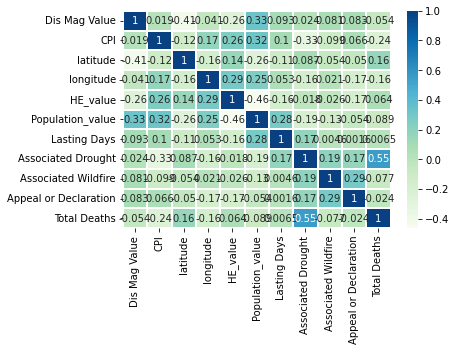

In [29]:
# heatmap of total deaths
cor_deaths = sns.heatmap(pd.concat([indvar,dvar["Total Deaths"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [15]:
# predict total deaths

def HW_model(model, X, y):
    np.random.seed(123)
    model.fit( X, y)
    pred_y = model.predict(X)
    kf = KFold(n_splits= 5)
    RMSE = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train,y_train)
        pred_y = model.predict(X_test)
        RMSE.append(math.sqrt(mean_squared_error(y_test, pred_y)))
        print('RMSE:',math.sqrt(mean_squared_error(y_test, pred_y)))
    print("Cross-Validation RMSE {0}".format(np.mean(RMSE)))

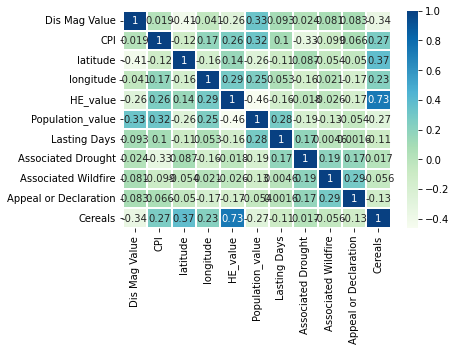

In [32]:
# heatmap of cereals
cor_cereals = sns.heatmap(pd.concat([indvar,dvar["Cereals"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [35]:
# predict cereals product
# linear model
print("--------Linear Regression--------")
model1 = LinearRegression()
HW_model(model1, indvar, dvar["Cereals"])

# decision tree
print("--------Decision Tree--------")
model2 = DecisionTreeClassifier()
HW_model(model2, indvar, dvar["Cereals"])

# random forest
print("--------Random Forest--------")
model3 = RandomForestClassifier(random_state = 10)
HW_model(model3, indvar, dvar[""])

#SVM
print("--------Support Vector Machine--------")
model4 = SVC()
HW_model(model4, indvar, dvar["Cereals"])

--------Linear Regression--------
RMSE: 16485.06315985207
RMSE: 11117.455598585351
RMSE: 29006.602280613926
RMSE: 15890.65061949919
RMSE: 14562.77519805369
Cross-Validation RMSE 17412.509371320844
--------Decision Tree--------
RMSE: 27398.4876237114
RMSE: 21161.09310346073
RMSE: 17017.029983715332
RMSE: 24353.882361271822
RMSE: 19039.971004879884
Cross-Validation RMSE 21794.092815407836
--------Random Forest--------
RMSE: 16076.469479750003
RMSE: 12155.946226710064
RMSE: 16386.174621714898
RMSE: 11403.727753093139
RMSE: 7212.962590595721
Cross-Validation RMSE 12647.056134372764
--------Support Vector Machine--------
RMSE: 41208.92994404651
RMSE: 39451.18108667133
RMSE: 42913.08673819678
RMSE: 24994.96738145501
RMSE: 12144.230987043464
Cross-Validation RMSE 32142.47922748262


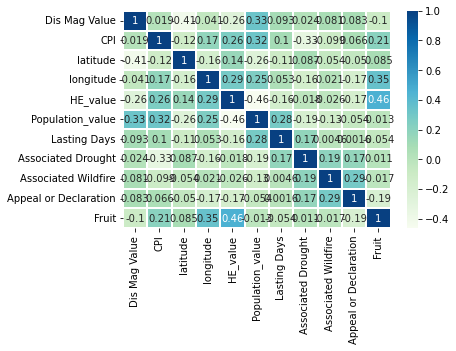

In [37]:
# heatmap of fruit
cor_cereals = sns.heatmap(pd.concat([indvar,dvar["Fruit"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [38]:
# predict fruit product
# linear model
print("--------Linear Regression--------")
model1 = LinearRegression()
HW_model(model1, indvar, dvar["Fruit"])

# decision tree
print("--------Decision Tree--------")
model2 = DecisionTreeClassifier()
HW_model(model2, indvar, dvar["Fruit"])

# random forest
print("--------Random Forest--------")
model3 = RandomForestClassifier(random_state = 10)
HW_model(model3, indvar, dvar["Fruit"])

#SVM
print("--------Support Vector Machine--------")
model4 = SVC()
HW_model(model4, indvar, dvar["Fruit"])

--------Linear Regression--------
RMSE: 77841.00401254257
RMSE: 63242.54290014206
RMSE: 50986.06294924906
RMSE: 59190.08893191448
RMSE: 55886.02955424076
Cross-Validation RMSE 61429.145669617785
--------Decision Tree--------
RMSE: 81653.27013945409
RMSE: 74278.01420788433
RMSE: 43522.67498289445
RMSE: 71987.06452597346
RMSE: 92430.04857909214
Cross-Validation RMSE 72774.2144870597
--------Random Forest--------
RMSE: 58517.601166372726
RMSE: 40843.29021271426
RMSE: 43199.06406625033
RMSE: 29858.419868885674
RMSE: 11556.619632631911
Cross-Validation RMSE 36794.998989370986
--------Support Vector Machine--------
RMSE: 71644.34852938507
RMSE: 64782.00603202508
RMSE: 37707.36267185318
RMSE: 69370.5782211258
RMSE: 20395.82259679663
Cross-Validation RMSE 52780.02361023715


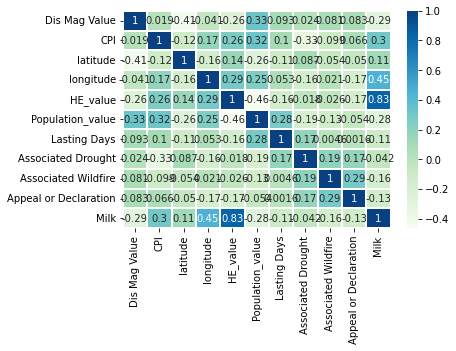

In [39]:
# heatmap of milk
cor_cereals = sns.heatmap(pd.concat([indvar,dvar["Milk"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [40]:
# predict milk product
# linear model
print("--------Linear Regression--------")
model1 = LinearRegression()
HW_model(model1, indvar, dvar["Milk"])

# decision tree
print("--------Decision Tree--------")
model2 = DecisionTreeClassifier()
HW_model(model2, indvar, dvar["Milk"])

# random forest
print("--------Random Forest--------")
model3 = RandomForestClassifier(random_state = 10)
HW_model(model3, indvar, dvar["Milk"])

#SVM
print("--------Support Vector Machine--------")
model4 = SVC()
HW_model(model4, indvar, dvar["Milk"])

--------Linear Regression--------
RMSE: 13514.828350582886
RMSE: 9473.141387095322
RMSE: 28516.674326763477
RMSE: 12049.414479636409
RMSE: 12675.806650850001
Cross-Validation RMSE 15245.973038985621
--------Decision Tree--------
RMSE: 28455.025703731142
RMSE: 23814.767043440366
RMSE: 12389.50507486074
RMSE: 37713.37683545897
RMSE: 43459.27483978535
Cross-Validation RMSE 29166.389899455313
--------Random Forest--------
RMSE: 10234.197421716402
RMSE: 9143.60377167194
RMSE: 23482.512799953925
RMSE: 18970.431557206775
RMSE: 7151.1697364836755
Cross-Validation RMSE 13796.383057406541
--------Support Vector Machine--------
RMSE: 30942.305980647274
RMSE: 26216.33785638261
RMSE: 27744.25677144731
RMSE: 18260.902122659038
RMSE: 21626.18866559709
Cross-Validation RMSE 24957.998279346666
